<a href="_index.ipynb">&larr; SRC </a>&loz;
<a href="../../README.md"> &uarr; TOC &uarr; </a>
<img src='../_img/icon.svg' align='right' width='10%'></img>
# SRC: Abtastratenwandlung und Interpolation in der Zeitebene #
Einstieg in Abtastratenwandlung im Zeitbereich, siehe auch [1] und [2].

In [3]:
import os, sys
module_path = os.path.abspath(os.path.join('..')) # append directory one level up to import path
if module_path not in sys.path:  # ... if it hasn't been appended already
    sys.path.append(module_path)
import dsp_fpga_lib as dsp # import and set plot properties
    
import matplotlib.pyplot as plt

import numpy as np
import scipy.signal as sig
from scipy.signal import upfirdn

figsize = {"figsize":(13,9)}

Die Funktion `scipy.signal.upfirdn(h, x, up=1, down=1, axis=-1)` funktioniert genauso, wie man sich Resampling vorstellt: Die Abtastrate einer Sequenz **`x`** wird durch Nullenstopfen um den Faktor **`up`** erhöht, sie wird mit dem FIR Filter **`h`** von Images befreit. Danach wird die Abtastrate um den Faktor **`down`** reduziert. Das Filter h dient daher gleichzeitig als Anti-Aliasfilter. 

**up :** Integer (optional, Default = 1) - der Upsamplingfaktor

**down :** Integer (optional, Default = 1) - der Downsamplingfaktor

**axis :** Integer (optional, Default = -1) - bei mehrdimensionalen Arrays die Achse, entlang der die Abtastrate geändert wird.

Das Ergebnis ist

**`y :`** Numpy Array mit den gleichen Dimensionen wie das Inputarray `x` außer entlang der Achse, entlang der die Abtastrate geändert wurde.

Hier ist die Dimension `ceil( [len(x) * up + len(h) - 1] / down )`. Weitere Informationen unter [2]_


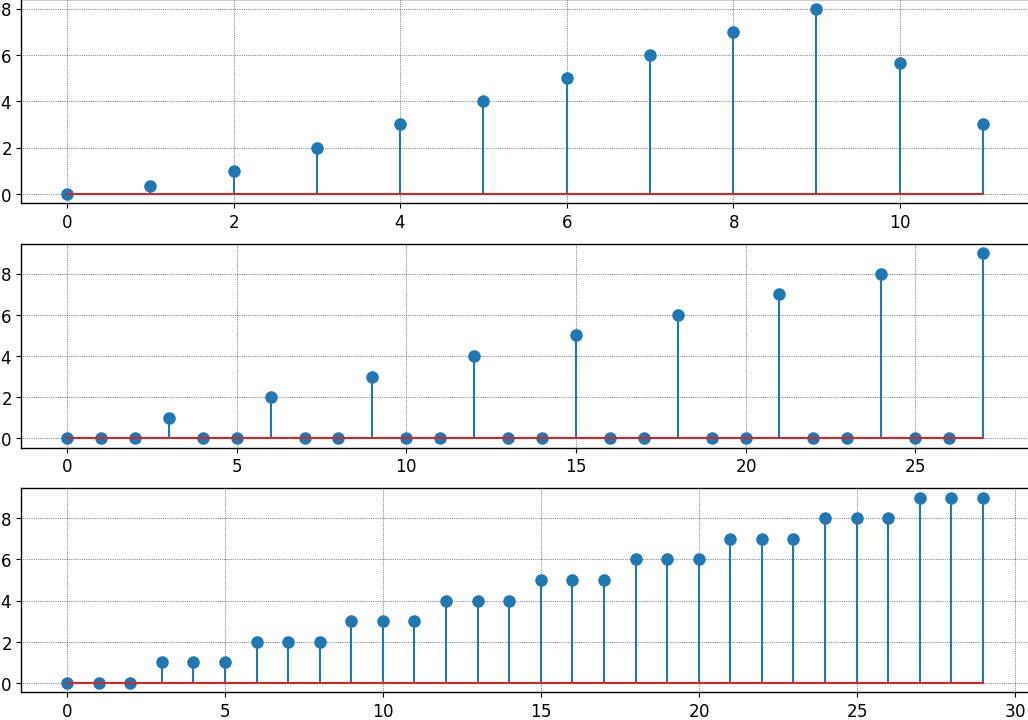

In [4]:
x = np.arange(10)
h = [1,1,1]
y0 = upfirdn(h,x)/3 # up = down = 1 -> nur Filterung mit h (Moving average)
y1 = upfirdn([1],x,3) # Filter = {1}, up = 3 -> upsampling mit Nullenstopfen um den Faktor 3
y2 = upfirdn(h,x,3) # Filter = {1;1;1}, up = 3 -> upsampling mit ZOH um den Faktor 3
fig, ax = plt.subplots(ncols=1, nrows=3, **figsize)
ax[0].stem(y0)
ax[1].stem(y1)
ax[2].stem(y2);

## Literatur ##

.. [1] http://signalsprocessed.blogspot.com/2016/08/audio-resampling-in-python.html?m=1 
 
.. [2] https://dsp.stackexchange.com/questions/3614/what-are-the-relative-merits-of-various-upsampling-schemes

.. [3] P. P. Vaidyanathan, Multirate Systems and Filter Banks,
       Prentice Hall, 1993.
       
.. [4] Dokumentation der `upfirdn()` Funktion aus `scipy.signal`, https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.upfirdn.html

***
### Copyright

(c) 2016 - 2021 Prof. Dr. Christian Münker 

This jupyter notebook is part of a collection of notebooks on various topics of Digital Signal Processing. The latest version can be found at https://github.com/chipmuenk/dsp.

This notebook is provided as [Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use it for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Christian Münker, Digital Signal Processing - Vorlesungsunterlagen mit Simulationsbeispielen, 2021*.